In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts

In [2]:
symbols=pd.read_excel('data_final.xlsx')['symbol']

# Probabilidad de transicción en cada estado 

$$p_{ij}=\frac{n_{ij}}{\sum_{j}n_{ij}}$$

### Estados

$$r \in S_{1} \rightarrow  r\leq C_{1}$$

$$r \in S_{2} \rightarrow  C_{1}<r\leq C_{2}$$

$$r \in  S_{3} \rightarrow  C_{2}<r\leq C_{3}$$

$$r \in S_{4} \rightarrow  C_{3}<r$$


In [12]:
def cadena_markov_t(symbol):
    def rendimientos(com):return np.diff(np.log(com))
    cierre=yf.download(symbol,start='2019-1-1',progress=0)['Close']
    cierre=list(cierre.dropna(axis=0))
    returns=rendimientos(cierre)
    c1,c2,c3=np.quantile(returns,[0.25,0.5,0.75])
    def status_rend(rendimiento):return "1" if rendimiento<=c1 else "2" if rendimiento<=c2 else "3" if rendimiento<=c3 else "4"
    stat_ren=list(map(status_rend,returns))
    cambios=[stat_ren[i]+stat_ren[i+1] for i in range(len(stat_ren)-1)]
    num_estados=[stat_ren.count(str(i)) for i in range(1,5)]
    matrix=[cambios.count(str(i)+str(j))/num_estados[i-1]  if num_estados[i-1]>0 else 0 for i in range(1,5) for j in range(1,5)]
    matrix=[round(m,2) for m in matrix]
    cadena_markov=pd.DataFrame(np.array(matrix).reshape(4,4),columns=[1,2,3,4],index=[1,2,3,4])
    last_status_rend=int(stat_ren[-1])-1
    vector=list(np.array(cadena_markov)[last_status_rend])
    futuros_rend=sts.norm.rvs(size=100_000)
    next_status=vector.index(max(vector))+1
    x={1:futuros_rend[(futuros_rend<=c1) & (futuros_rend>=min(returns))][0],
      2:futuros_rend[(futuros_rend>c1) & (futuros_rend<=c2)][0],
      3:futuros_rend[(futuros_rend>c2) & (futuros_rend<=c3)][0],
      4:futuros_rend[(futuros_rend>c3) & (futuros_rend<=max(returns))][0]}
    return returns +[x[next_status]]

In [13]:
cadena_markov_t(symbols[0])

array([-5.21721407e-02,  7.04440543e-02,  4.29229351e-02,  5.96165872e-02,
        5.45996720e-02,  4.03339809e-02,  3.30929820e-02,  1.72720728e-02,
        6.75366026e-02,  4.82976108e-02,  5.11850940e-02,  5.36324885e-02,
        4.79107340e-02,  2.13239541e-02,  4.02893504e-02,  3.13202648e-02,
        7.71412237e-02,  3.33184146e-02,  3.31986979e-02,  1.15882163e-01,
        5.10987343e-02,  4.14343357e-02,  8.38944872e-02,  4.39672503e-02,
        2.49833695e-02,  3.81164029e-02,  5.24455221e-02,  4.71678736e-02,
        4.71193391e-02,  4.01513218e-02,  3.69125289e-02,  4.98132103e-02,
        3.61004240e-02,  5.26217636e-02,  3.83642659e-02,  4.59628138e-02,
        5.33241849e-02,  4.39871004e-02,  4.61062890e-02,  4.17418747e-02,
        5.04842327e-02,  4.78937622e-02,  4.04993540e-02,  4.18913139e-02,
        4.41361643e-02,  3.83231778e-02,  7.25045827e-02,  4.85648783e-02,
        5.12026281e-02,  5.28971929e-02,  5.17442609e-02,  2.87981259e-02,
        4.31144312e-02,  

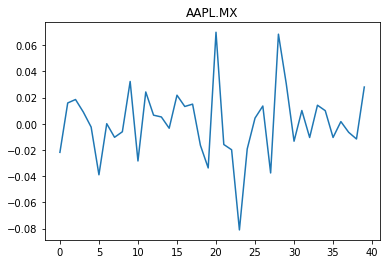

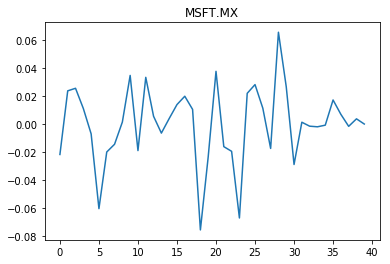

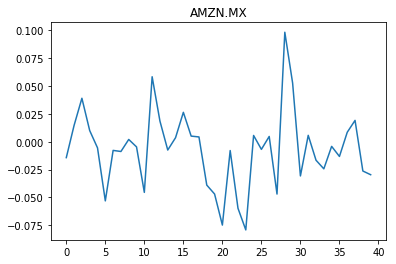

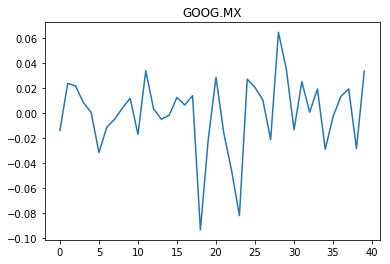

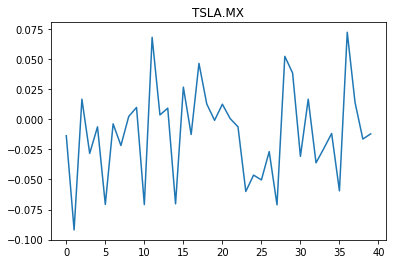

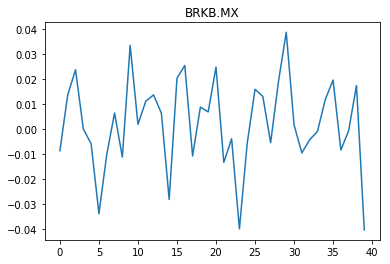

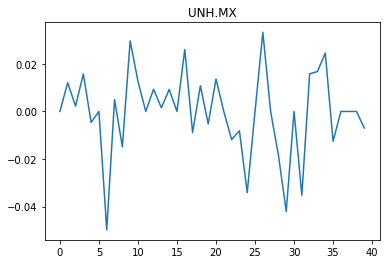

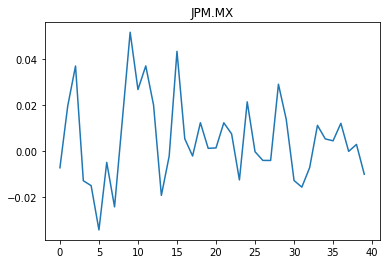

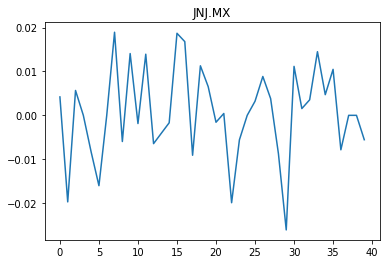

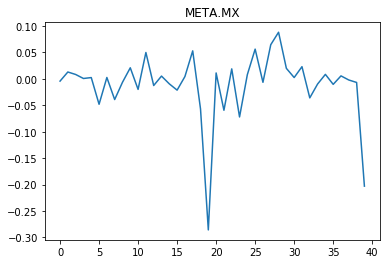

In [110]:
for simbol in symbols[:10]:
    plt.title(simbol)
    plt.plot(cadena_markov_t(simbol)[-40:])
    plt.show()

In [4]:
matrices=list(map(cadena_markov_t,symbols))

In [4]:
cadena_markov_t(symbols[0])

(Estado Final       1     2     3     4
 Estado Inicial                        
 1               0.25  0.25  0.18  0.31
 2               0.23  0.23  0.27  0.27
 3               0.24  0.28  0.29  0.18
 4               0.27  0.24  0.25  0.24, 3, 3)

In [5]:
# Matriz de transición de cada estado, 
#estado del ultimo rendimiento, estado con mayor prob de transicción
matrices[78][0]

Estado Final,1,2,3,4
Estado Inicial,,,,
1,0.22,0.25,0.24,0.29
2,0.22,0.24,0.31,0.23
3,0.22,0.29,0.25,0.24
4,0.34,0.22,0.20,0.24


In [6]:
matrices

[(Estado Final       1     2     3     4
  Estado Inicial                        
  1               0.26  0.26  0.18  0.31
  2               0.23  0.22  0.28  0.27
  3               0.25  0.28  0.29  0.18
  4               0.26  0.24  0.25  0.24, 1),
 (Estado Final       1     2     3     4
  Estado Inicial                        
  1               0.28  0.20  0.21  0.31
  2               0.22  0.28  0.25  0.24
  3               0.19  0.30  0.29  0.22
  4               0.31  0.21  0.25  0.23, 1),
 (Estado Final       1     2     3     4
  Estado Inicial                        
  1               0.27  0.27  0.23  0.23
  2               0.25  0.28  0.23  0.25
  3               0.21  0.22  0.33  0.24
  4               0.27  0.23  0.21  0.29, 4),
 (Estado Final       1     2     3     4
  Estado Inicial                        
  1               0.25  0.22  0.21  0.32
  2               0.20  0.34  0.20  0.26
  3               0.27  0.25  0.26  0.22
  4               0.28  0.27  0.26  0.19, 